In [1]:
import numpy as np
import numpy.linalg as nlg
import scipy as sc
from scipy.spatial import cKDTree
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from timeit import default_timer as timer
from scipy.special import jv, hyp1f1, factorial

In [2]:
def compute_dsff(z_n, tau):
    """Compute the DSFF for a given set of eigenvalues and a complex time tau."""
    tau_star = np.conj(tau)
    sum_exp = np.sum(np.exp(1j * (z_n * tau_star + np.conj(z_n) * tau) / 2)) #equation from ghosh et.al
    return np.abs(sum_exp)**2

In [3]:
def Poiss_Ptheta():
    return 1/2*np.pi

In [ ]:
GinUEr = [[0.016949, 0.0017], [0.033127, 0.00364], [0.049305, 0.0038], [0.067796, 0.00067], [0.087829, 0.00574], [0.104008, 0.00558],
[0.120189, 0.01204], [0.134059, 0.02182], [0.150242, 0.03489],[0.165654, 0.04796], [0.181838, 0.06433],
          [0.197251, 0.08072],[0.214207, 0.10039], [0.229622, 0.12338], [0.246581, 0.15628], [0.263539, 0.18257], [0.279728, 0.21879], [0.292062, 0.24181], [0.302855, 0.26485], [0.311337, 0.28792], [0.32213, 0.31096],
[0.332153, 0.33731], [0.34449, 0.37026], [0.354514, 0.39662],
[0.369936, 0.44276], [0.386903, 0.49881], [0.409263, 0.55811],
[0.431628, 0.63395], [0.450137, 0.69329], [0.471734, 0.77574],
[0.491013, 0.83838], [0.507211, 0.90105], [0.528036, 0.9769],
[0.548862, 1.05606], [0.568915, 1.12862], [0.592823, 1.21105],
[0.609794, 1.28033], [0.628305, 1.34959], [0.650672, 1.43204],
[0.669181, 1.49138], [0.690004, 1.56392], [0.711598, 1.63646],
[0.730878, 1.6991], [0.750931, 1.77165], [0.769441, 1.8376],
[0.788719, 1.90363], [0.80775, 1.9661], [0.828052, 2.02882],
[0.848096, 2.08861], [0.869689, 2.14084], [0.888968, 2.20018],
[0.907471, 2.25298], [0.927523, 2.31223], [0.949113, 2.37154],
[0.969929, 2.42093], [0.989202, 2.46042]]


GinUEth =[[-3.14136, 0.214346], [-3.05653, 0.213836], [-2.95058, 0.213819],
[-2.86131, 0.212817], [-2.75531, 0.211812], [-2.6493, 0.210806],
[-2.56005, 0.210298], [-2.4596, 0.2088], [-2.36469, 0.206809],
[-2.25311, 0.205803], [-2.15815, 0.202824], [-2.05209, 0.200832],
[-1.95716, 0.198347], [-1.84547, 0.195366], [-1.7505, 0.192387],
[-1.6667, 0.18941], [-1.56053, 0.185442], [-1.44873, 0.180485],
[-1.35923, 0.175532], [-1.26408, 0.169097], [-1.16335, 0.162661],
[-1.04553, 0.149802], [-0.95024, 0.140897], [-0.85475, 0.128536],
[-0.75361, 0.114692], [-0.65244, 0.100354], [-0.5567, 0.083548],
[-0.45559, 0.070198], [-0.35442, 0.055861], [-0.25333, 0.043005],
[-0.14136, 0.035085], [-0.05195, 0.031613], [-0.00173, 0.031111],
[0.00173, 0.031111], [0.05195, 0.031613], [0.14136, 0.035085],
[0.25333, 0.043005], [0.35442, 0.055861], [0.45559, 0.070198],
[0.5567, 0.083548], [0.65244, 0.100354], [0.75361, 0.114692],
[0.85475, 0.128536], [0.95024, 0.140897], [1.04553, 0.149802],
[1.16335, 0.162661], [1.26408, 0.169097], [1.35923, 0.175532],
[1.44873, 0.180485], [1.56053, 0.185442], [1.6667, 0.18941], [1.7505,
0.192387], [1.84547, 0.195366], [1.95716, 0.198347], [2.05209,
0.200832], [2.15815, 0.202824], [2.25311, 0.205803], [2.36469,
0.206809], [2.4596, 0.2088], [2.56005, 0.210298], [2.6493, 0.210806],
[2.75531, 0.211812], [2.86131, 0.212817], [2.95058, 0.213819],
[3.05653, 0.213836], [3.14136, 0.214346]]


PrTUE5 = [[2*10e-6 , 0.000272], [0.011435, 0.000815], [0.022865, 0.001087],
[0.036199, 0.001087], [0.052068, 0.00543], [0.069845, 0.00543],
[0.084447, 0.00272], [0.100952, 0], [0.118087, 0.01087], [0.134589,
0.01902], [0.152356, 0.03261], [0.167584, 0.0462], [0.182807,
0.06522], [0.199307, 0.07609], [0.213894, 0.09783], [0.227845,
0.11957], [0.241799, 0.13859], [0.253846, 0.16033], [0.264627,
0.17663], [0.271597, 0.19565], [0.283009, 0.21739], [0.293153,
0.23641], [0.305194, 0.2663], [0.315965, 0.2962], [0.32674, 0.32065],
[0.336876, 0.35054], [0.347016, 0.375], [0.359055, 0.40761],
[0.369823, 0.44022], [0.379957, 0.47283], [0.390728, 0.50272],
[0.398959, 0.53261], [0.409093, 0.56522], [0.420493, 0.60326],
[0.429357, 0.63587], [0.438862, 0.66033], [0.448359, 0.69565],
[0.45659, 0.72554], [0.46799, 0.76359], [0.478117, 0.80435],
[0.488251, 0.83696], [0.498377, 0.88043], [0.510409, 0.9212],
[0.521805, 0.96467], [0.535736, 1.01359], [0.548399, 1.05978],
[0.55536, 1.08967], [0.564859, 1.12228], [0.574991, 1.15761],
[0.582587, 1.1875], [0.591449, 1.22283], [0.600313, 1.25543],
[0.612983, 1.29348], [0.624376, 1.33967], [0.637676, 1.38315],
[0.647175, 1.41576], [0.654774, 1.44293], [0.666802, 1.48913],
[0.676938, 1.51902], [0.687072, 1.55163], [0.697204, 1.58696],
[0.707968, 1.625], [0.719372, 1.65761], [0.7314, 1.7038], [0.744072,
1.73913], [0.753573, 1.76902], [0.763705, 1.80435], [0.776378,
1.83696], [0.786508, 1.875], [0.797912, 1.90761], [0.810577,
1.95109], [0.822609, 1.99185], [0.837182, 2.03261], [0.849857,
2.0625], [0.86189, 2.10326], [0.877734, 2.1413], [0.893569, 2.19022],
[0.90815, 2.22011], [0.924625, 2.26359], [0.938564, 2.30163],
[0.951237, 2.33424], [0.964546, 2.36685], [0.977852, 2.40217],
[0.989258, 2.43207], [0.996232, 2.44565]]


PthTUE5 = [[-3.1459, 0.192464], [-3.03252, 0.190889], [-2.93222, 0.19031],
[-2.84501, 0.190343], [-2.74907, 0.191144], [-2.64877, 0.191946],
[-2.54847, 0.193131], [-2.46125, 0.193929], [-2.36966, 0.19511],
[-2.25628, 0.195917], [-2.14725, 0.197105], [-2.02952, 0.19715],
[-1.92486, 0.197572], [-1.81586, 0.197232], [-1.70252, 0.194601],
[-1.61098, 0.192343], [-1.51508, 0.189705], [-1.42356, 0.185919],
[-1.33202, 0.182897], [-1.26232, 0.177574], [-1.17954, 0.172639],
[-1.10112, 0.166937], [-1.02706, 0.161234], [-0.96609, 0.155526],
[-0.90948, 0.149434], [-0.86593, 0.144484], [-0.82676, 0.138767],
[-0.77016, 0.131529], [-0.72664, 0.124668], [-0.68313, 0.117807],
[-0.63959, 0.112092], [-0.60043, 0.105611], [-0.56128, 0.097984],
[-0.51776, 0.090741], [-0.47425, 0.08388], [-0.43509, 0.076635],
[-0.39158, 0.069392], [-0.33935, 0.061388], [-0.2784, 0.054151],
[-0.22181, 0.045767], [-0.14777, 0.039299], [-0.06934, 0.034362],
[0.03094, 0.033254], [0.10509, 0.035575], [0.16183, 0.039418],
[0.21858, 0.044407], [0.26225, 0.049773], [0.30593, 0.055903],
[0.35399, 0.063563], [0.39767, 0.069311], [0.437, 0.076204],
[0.47195, 0.081949], [0.51564, 0.088843], [0.55934, 0.09612],
[0.60303, 0.103396], [0.63365, 0.110668], [0.68168, 0.116036],
[0.72101, 0.122928], [0.76469, 0.129441], [0.80838, 0.136335],
[0.86515, 0.14247], [0.91755, 0.148986], [0.96558, 0.153972],
[1.02235, 0.160489], [1.09218, 0.165865], [1.14894, 0.171236],
[1.20567, 0.175079], [1.27985, 0.179692], [1.34094, 0.183154],
[1.41948, 0.187005], [1.48493, 0.190087], [1.57653, 0.192797],
[1.65941, 0.195503], [1.7292, 0.197058], [1.82951, 0.199007],
[1.92981, 0.199809], [2.03009, 0.198701], [2.1173, 0.198735],
[2.21323, 0.198389], [2.30478, 0.197278], [2.40943, 0.196936],
[2.50534, 0.195444], [2.60561, 0.193954], [2.71026, 0.19323],
[2.8149, 0.192506], [2.92391, 0.192165], [3.02856, 0.192587],
[3.13321, 0.192245]]

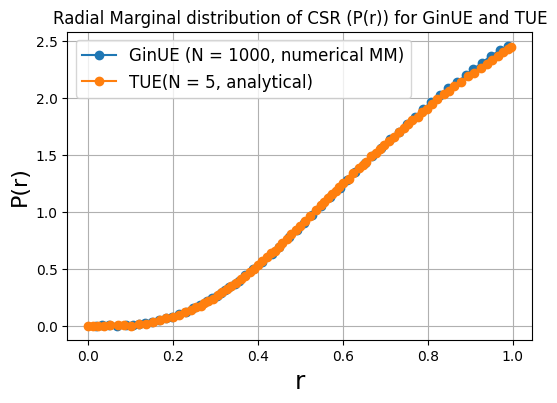

In [ ]:
# Extract x and y values from the data
x_values1 = [point[0] for point in GinUEr]
y_values1 = [point[1] for point in GinUEr]

x_values2 = [point[0] for point in PrTUE5]
y_values2 = [point[1] for point in PrTUE5]


# Plotting the data
plt.figure(figsize=(6, 4))
plt.plot(x_values1, y_values1, marker='o', linestyle='-')  # Adjust marker and linestyle as needed
plt.plot(x_values2, y_values2, marker='o', linestyle='-')  # Adjust marker and linestyle as needed
plt.xlabel('r', fontsize = 18)
plt.ylabel('P(r)', fontsize = 16)
plt.legend(["GinUE (N = 1000, numerical MM)", "TUE(N = 5, analytical)"], loc ="upper left", fontsize = 12)
plt.title('Radial Marginal distribution of CSR (P(r)) for GinUE and TUE')
plt.grid(True)
plt.show()

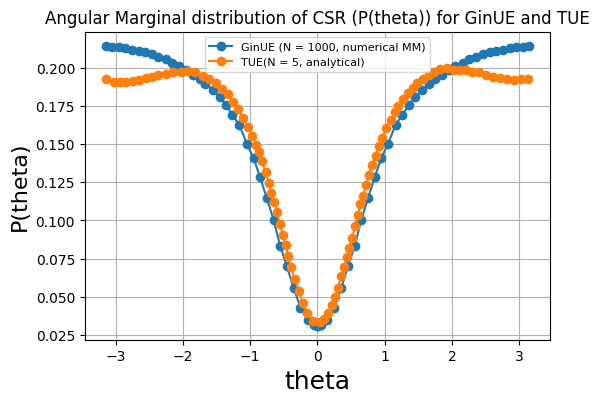

In [ ]:
# Extract x and y values from the data
x_values1 = [point[0] for point in GinUEth]
y_values1 = [point[1] for point in GinUEth]

x_values2 = [point[0] for point in PthTUE5]
y_values2 = [point[1] for point in PthTUE5]

# Plotting the data
plt.figure(figsize=(6, 4))
plt.plot(x_values1, y_values1, marker='o', linestyle='-')  # Adjust marker and linestyle as needed
plt.plot(x_values2, y_values2, marker='o', linestyle='-')  # Adjust marker and linestyle as needed
plt.xlabel('theta', fontsize = 18)
plt.ylabel('P(theta)', fontsize = 16)
plt.legend(["GinUE (N = 1000, numerical MM)", "TUE(N = 5, analytical)"], loc ="upper center", fontsize = 8)
plt.title('Angular Marginal distribution of CSR (P(theta)) for GinUE and TUE')
plt.grid(True)
plt.show()

Analytical results for the DSFF from RMT

In [9]:
def DSFFfull(n, tau):
    tau_abs = np.abs(tau)
    return 1/n + (4 * (jv(1, tau_abs)**2)) / (tau_abs**2) - (1/n) * np.exp(-(tau_abs**2 / (4 * n)))

def DSFFGinUEasymp(n, tau):
    return 1 - np.exp(-(tau**2 / (4 * n)))

def Kcfull(tau, N):
    tau_squared = tau**2
    first_term = N
    second_term = N**2 * hyp1f1(N + 1, 2, -tau_squared / (4 * N))**2
    double_sum = 0
    for p in range(N):
        for s in range(N):
            max_ps = max(p, s)
            abs_diff = np.abs(p - s)
            factor = (factorial(max_ps) * tau**abs_diff) / (factorial(abs_diff) * 2**abs_diff * N**max_ps)
            term = hyp1f1(max_ps + 1, abs_diff + 1, -tau_squared / (4 * N))
            double_sum += (N**(p + s) / (factorial(p) * factorial(s))) * (factor * term)**2
    return first_term + second_term - double_sum

# Example plotting
t_values = np.linspace(0.1, 300, 100000)
n = 50
#N = 100

In [29]:
start = timer()
def crossover(n,ens):
    #evt = []
    #grdt = []
    dsff_values = np.zeros_like(t_values)
    s = 0.3
    for i in tqdm(range(ens)):
        #H0 = np.random.normal(0, 1/np.sqrt(2*n), (n,n))
        H1 = np.random.normal(0, 1/np.sqrt(2*n), (n,n)) + 1j * np.random.normal(0, 1/np.sqrt(2*n), (n,n))
        #H = 1/(1+lamb**2)*H0 + lamb/(1+lamb**2)*H1
        eigv = nlg.eigvals(H1)
        # evt.extend(eigv)
        # grd = []#
        # kdt_eigv = np.stack([np.real(eigv), np.imag(eigv)], axis=-1)
        # kdt = cKDTree(kdt_eigv)
        # for j in range(n):
        #     dists, indices = kdt.query(kdt_eigv[j], 3)
        #     nns = eigv[indices]
        #     grd.append((nns[1] - eigv[j]) / (nns[2] - eigv[j]))
        # grdt.append(grd)
        for k, t in enumerate(t_values):
            tau = t + 1j*s
            dsff_values[k] += compute_dsff(eigv, tau)
    return dsff_values
#evt,grdt,

n = 3000
ens = 5
t_values = np.linspace(0.1, 300, 100000)
#lamb = 1


dsff_values =  crossover(n,ens)


end = timer()
print(end - start)

  0%|          | 0/5 [00:00<?, ?it/s]

419.24615169200115


In [ ]:
e1 = np.array(eigv).flatten()
e2 = np.array(CSR).flatten()

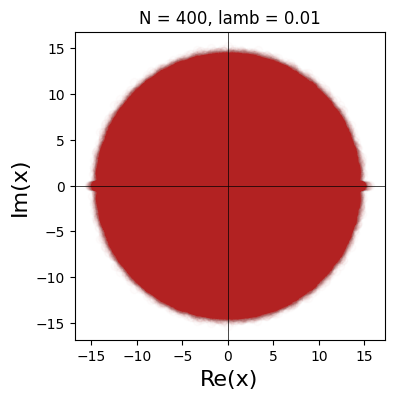

In [ ]:
#########################The eigenvalue distribution##########################################
plt.figure(figsize=(4, 4))
plt.scatter(np.real(e1), np.imag(e1), color='firebrick', alpha=0.01)
plt.title(f"N = 400, lamb = 0.01")
plt.xlabel("Re(x)",fontsize = 16)
plt.ylabel("Im(x)",fontsize = 16)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
#plt.savefig('C:\\Users\\msaha\\Downloads\\data and code for NH-GinOE-GinUE-cluster\\cross-eig-lam001-N100ens3000.pdf', format='pdf', dpi=600)
plt.show()

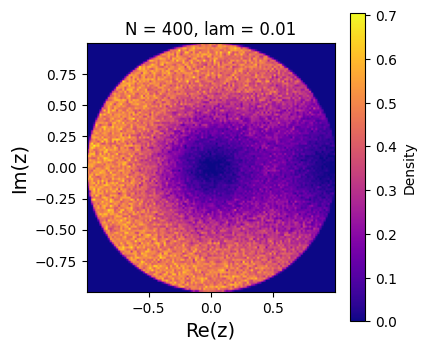

In [ ]:
# Example data, replace this with your data
x = np.real(e2)
y = np.imag(e2)

# Calculate 2D histogram
heatmap, xedges, yedges = np.histogram2d(x, y, bins=120, density=True)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.figure(figsize=(4, 4))

# Plot smooth density histogram
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='plasma')
plt.colorbar(label='Density')
plt.xlabel('Re(z)',fontsize = 14)
plt.ylabel('Im(z)',fontsize = 14)
plt.title('N = 400, lam = 0.01')
#plt.savefig('C:\\Users\\msaha\\Downloads\\data and code for NH-GinOE-GinUE-cluster\\cross-CSR-lam001-N100ens3000.pdf', format='pdf', dpi=600)
plt.show()

In [16]:
ens

1000

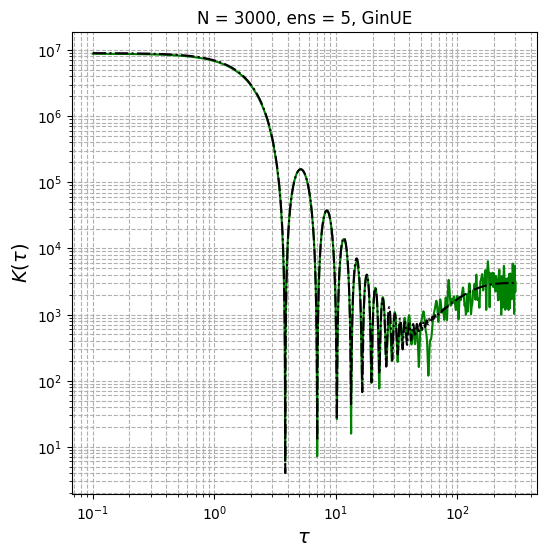

In [30]:
plt.figure(figsize=(6, 6))
plt.loglog(t_values,dsff_values/ens, color = 'green',label=f'Log-Log DSFF for GinUE')
plt.loglog(t_values, [n**2*DSFFfull(n, tau) for tau in t_values], color='black',linestyle = '-.')
plt.xlabel(r'$\tau$',fontsize = 14)
plt.ylabel(r'$K(\tau)$', fontsize = 14)
plt.title('N = 3000, ens = 5, GinUE')
#plt.legend()
plt.grid(True, which="both", ls="--")  # Adding a grid for better readability
#plt.savefig('C:\\Users\\msaha\\Downloads\\data and code for NH-GinOE-GinUE-cluster\\cross-DSFF-lam001-N100ens3000.pdf', format='pdf', dpi=700)
plt.show()

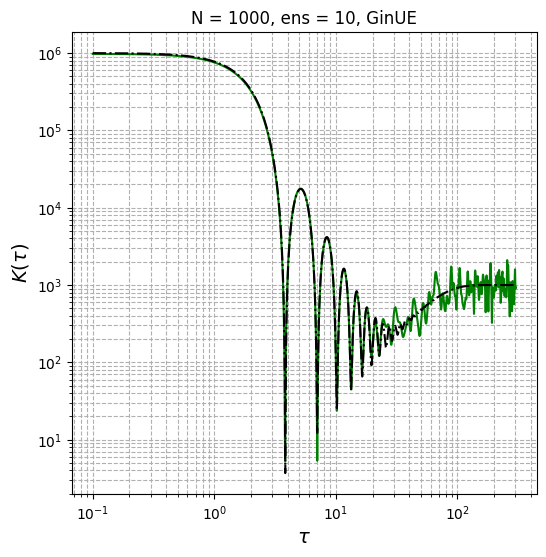

In [28]:
plt.figure(figsize=(6, 6))
plt.loglog(t_values,dsff_values/ens, color = 'green',label=f'Log-Log DSFF for GinUE')
plt.loglog(t_values, [n**2*DSFFfull(n, tau) for tau in t_values], color='black',linestyle = '-.')
plt.xlabel(r'$\tau$',fontsize = 14)
plt.ylabel(r'$K(\tau)$', fontsize = 14)
plt.title('N = 1000, ens = 10, GinUE')
#plt.legend()
plt.grid(True, which="both", ls="--")  # Adding a grid for better readability
#plt.savefig('C:\\Users\\msaha\\Downloads\\data and code for NH-GinOE-GinUE-cluster\\cross-DSFF-lam001-N100ens3000.pdf', format='pdf', dpi=700)
plt.show()

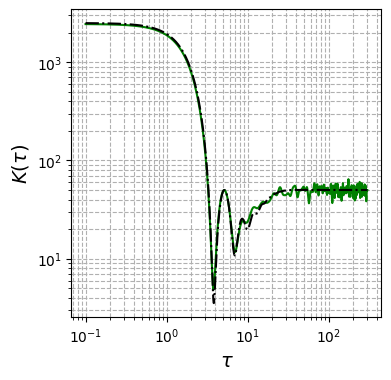

In [24]:
plt.figure(figsize=(4, 4))
plt.loglog(t_values,dsff_values/ens, color = 'green',label=f'Log-Log DSFF for GinUE')
plt.loglog(t_values, [n**2*DSFFfull(n, tau) for tau in t_values], color='black',linestyle = '-.')
plt.xlabel(r'$\tau$',fontsize = 14)
plt.ylabel(r'$K(\tau)$', fontsize = 14)
#plt.title('N = 400, lamb = 0.01')
#plt.legend()
plt.grid(True, which="both", ls="--")  # Adding a grid for better readability
#plt.savefig('C:\\Users\\msaha\\Downloads\\data and code for NH-GinOE-GinUE-cluster\\cross-DSFF-lam001-N100ens3000.pdf', format='pdf', dpi=700)
plt.show()

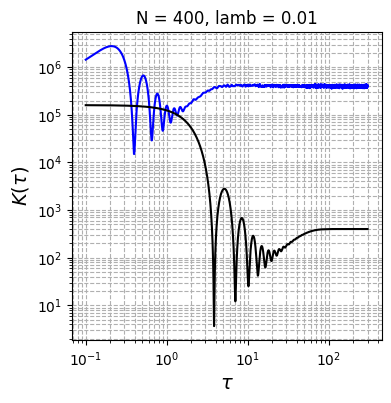

In [ ]:
plt.figure(figsize=(4, 4))
plt.loglog(t_values,dsff_values, color = 'blue',label=f'Log-Log DSFF for GinUE, N={len(eigv)}')
plt.loglog(t_values, [n**2*DSFFfull(n, tau) for tau in t_values], color='black')
plt.xlabel(r'$\tau$',fontsize = 14)
plt.ylabel(r'$K(\tau)$', fontsize = 14)
plt.title('N = 400, lamb = 0.01')
#plt.legend()
plt.grid(True, which="both", ls="--")  # Adding a grid for better readability
#plt.savefig('C:\\Users\\msaha\\Downloads\\data and code for NH-GinOE-GinUE-cluster\\cross-DSFF-lam001-N100ens3000.pdf', format='pdf', dpi=700)
plt.show()

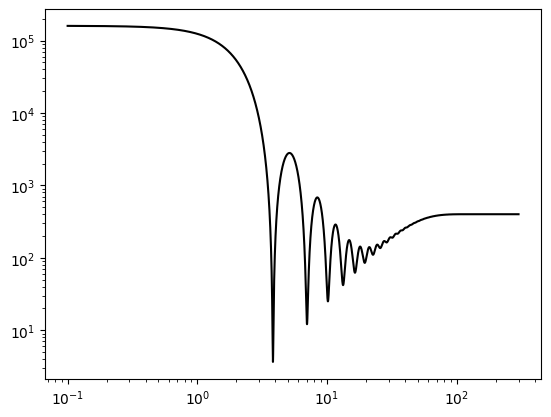

In [ ]:
plt.loglog(t_values, [n**2*DSFFfull(n, tau) for tau in t_values], color='black')

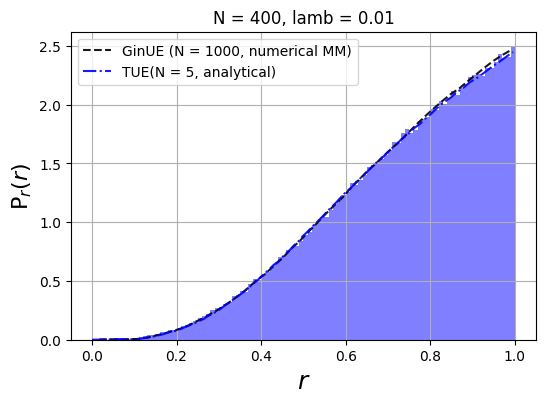

In [ ]:
# Extract x and y values from the data
x_values1 = [point[0] for point in GinUEr]
y_values1 = [point[1] for point in GinUEr]

x_values2 = [point[0] for point in PrTUE5]
y_values2 = [point[1] for point in PrTUE5]

#marker='o',marker='s'

# Plotting the data
plt.figure(figsize=(6, 4))
plt.hist(abs(e2),range = [0,1],  bins=100, density=True, alpha=0.5, color='blue')
plt.plot(x_values1, y_values1, color='black', linestyle='--',alpha=0.9)  # Adjust marker and linestyle as needed
plt.plot(x_values2, y_values2,  color='blue', linestyle='-.',alpha=0.9)  # Adjust marker and linestyle as needed
plt.xlabel(r'$r$', fontsize = 18)
plt.ylabel(r'P$_{r}(r)$', fontsize = 16)
plt.legend(["GinUE (N = 1000, numerical MM)", "TUE(N = 5, analytical)"], loc ="upper left", fontsize = 10)
plt.title('N = 400, lamb = 0.01')
#plt.savefig('C:\\Users\\msaha\\Downloads\\data and code for NH-GinOE-GinUE-cluster\\cross-pr-lam001-N100ens3000.pdf', format='pdf', dpi=700)
plt.grid(True)
plt.show()

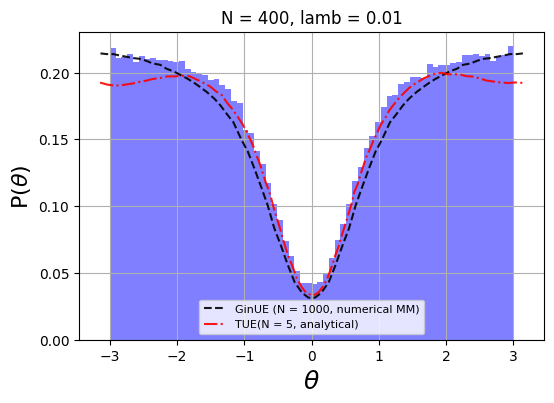

In [ ]:
# Extract x and y values from the data
x_values1 = [point[0] for point in GinUEth]
y_values1 = [point[1] for point in GinUEth]

x_values2 = [point[0] for point in PthTUE5]
y_values2 = [point[1] for point in PthTUE5]

# Plotting the data
plt.figure(figsize=(6, 4))
plt.hist(np.angle(e2),range = [-3,3],  bins=70, density=True, alpha=0.5, color='blue')
plt.plot(x_values1, y_values1, color='black', linestyle='--',alpha=0.9)  # Adjust marker and linestyle as needed
plt.plot(x_values2, y_values2, color='red', linestyle='-.',alpha=0.9)  # Adjust marker and linestyle as needed
plt.xlabel(r'$\theta$', fontsize = 18)
plt.ylabel(r'P($\theta$)', fontsize = 16)
plt.legend(["GinUE (N = 1000, numerical MM)", "TUE(N = 5, analytical)"], loc ="lower center", fontsize = 8)
plt.title('N = 400, lamb = 0.01')
plt.grid(True)
plt.savefig('C:\\Users\\msaha\\Downloads\\data and code for NH-GinOE-GinUE-cluster\\cross-pth-lam001-N400ens1000.pdf', format='pdf', dpi=700)
plt.show()